# Next Word Prediction — Phase 0
### Project: Mini GPT-like Language Model
### Dataset: The Adventures of Sherlock Holmes (Project Gutenberg)

Goal of this notebook:
- Load the raw text file
- Verify encoding
- Inspect initial content


In [4]:
import os
import io


In [5]:
file_path = "../data/book.txt"

with io.open(file_path, encoding="utf-8") as f:
    text = f.read()


In [6]:
print("Total characters:", len(text))
print("\nFirst 1000 characters:\n")
print(text[:1000])


Total characters: 581888

First 1000 characters:

﻿
Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with th

In [7]:
start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***"
end_marker = "*** END OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***"

start_idx = text.find(start_marker)
end_idx = text.find(end_marker)

story_text = text[start_idx + len(start_marker): end_idx]


In [8]:
print(story_text[:1000])






Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue Carbuncle
   VIII.  The Adventure of the Speckled Band
   IX.    The Adventure of the Engineer’s Thumb
   X.     The Adventure of the Noble Bachelor
   XI.    The Adventure of the Beryl Coronet
   XII.   The Adventure of the Copper Beeches



I. A SCANDAL IN BOHEMIA


I.

To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanc

In [9]:
story_text = story_text.lower()

In [10]:
print(story_text[:1000])





produced by an anonymous project gutenberg volunteer and jose menendez



cover



the adventures of sherlock holmes



by arthur conan doyle



contents


   i.     a scandal in bohemia
   ii.    the red-headed league
   iii.   a case of identity
   iv.    the boscombe valley mystery
   v.     the five orange pips
   vi.    the man with the twisted lip
   vii.   the adventure of the blue carbuncle
   viii.  the adventure of the speckled band
   ix.    the adventure of the engineer’s thumb
   x.     the adventure of the noble bachelor
   xi.    the adventure of the beryl coronet
   xii.   the adventure of the copper beeches



i. a scandal in bohemia


i.

to sherlock holmes she is always _the_ woman. i have seldom heard him
mention her under any other name. in his eyes she eclipses and
predominates the whole of her sex. it was not that he felt any emotion
akin to love for irene adler. all emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanc

In [11]:
import re

# Replace em-dashes and special quotes
story_text = story_text.replace("—", " ")
story_text = story_text.replace("’", "'")

# Remove punctuation except apostrophes
story_text = re.sub(r"[^a-zA-Z0-9'\s]", " ", story_text)


In [12]:
story_text = re.sub(r"\s+", " ", story_text).strip()

In [13]:
print("Characters after cleaning:", len(story_text))
print("\nSample cleaned text:\n")
print(story_text[:500])


Characters after cleaning: 538826

Sample cleaned text:

produced by an anonymous project gutenberg volunteer and jose menendez cover the adventures of sherlock holmes by arthur conan doyle contents i a scandal in bohemia ii the red headed league iii a case of identity iv the boscombe valley mystery v the five orange pips vi the man with the twisted lip vii the adventure of the blue carbuncle viii the adventure of the speckled band ix the adventure of the engineer's thumb x the adventure of the noble bachelor xi the adventure of the beryl coronet xii 


In [14]:
#split text into words
words = story_text.split()

In [15]:
print("Total words:", len(words))
print("First 30 words:", words[:30])

Total words: 105857
First 30 words: ['produced', 'by', 'an', 'anonymous', 'project', 'gutenberg', 'volunteer', 'and', 'jose', 'menendez', 'cover', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'contents', 'i', 'a', 'scandal', 'in', 'bohemia', 'ii', 'the', 'red', 'headed']


In [16]:
#total vocabulary size
vocab = set(words)
print("Vocabulary size:", len(vocab))

Vocabulary size: 8046


In [17]:
from collections import Counter

word_counts = Counter(words)
word_counts.most_common(20)

[('the', 5632),
 ('and', 3019),
 ('i', 3003),
 ('to', 2744),
 ('of', 2658),
 ('a', 2642),
 ('in', 1766),
 ('that', 1744),
 ('it', 1701),
 ('you', 1481),
 ('he', 1467),
 ('was', 1410),
 ('his', 1159),
 ('is', 1124),
 ('my', 1007),
 ('have', 924),
 ('as', 852),
 ('had', 831),
 ('with', 830),
 ('which', 771)]

In [18]:
word_counts.most_common()[-20:]

[('sobered', 1),
 ('relieve', 1),
 ('assembled', 1),
 ("ha'", 1),
 ("alice's", 1),
 ('slighted', 1),
 ('fever', 1),
 ("death's", 1),
 ('persevering', 1),
 ('seaman', 1),
 ('blockaded', 1),
 ('arguments', 1),
 ('locus', 1),
 ('standi', 1),
 ('survived', 1),
 ('solely', 1),
 ('mauritius', 1),
 ('manifested', 1),
 ('walsall', 1),
 ('ebook', 1)]

In [19]:
bigrams = list(zip(words, words[1:]))
bigram_counts = Counter(bigrams)
bigram_counts.most_common(10)

[(('of', 'the'), 716),
 (('in', 'the'), 506),
 (('it', 'is'), 335),
 (('to', 'the'), 304),
 (('i', 'have'), 301),
 (('it', 'was'), 279),
 (('that', 'i'), 254),
 (('at', 'the'), 237),
 (('and', 'i'), 213),
 (('and', 'the'), 199)]

In [20]:
#sentence length intuition - should have done earlier before modifying the stroy_text
import numpy as np

sentence_lengths = [len(s.split()) for s in story_text.split('.') if len(s.split()) > 0]
print("Average sentence length:", int(np.mean(sentence_lengths)))

Average sentence length: 105857


In [21]:
# Create sorted vocabulary
vocab = sorted(set(words))

print("Vocabulary size:", len(vocab))


Vocabulary size: 8046


In [22]:
word_to_index = {word: idx for idx, word in enumerate(vocab)}
index_to_word = {idx: word for word, idx in word_to_index.items()}

In [23]:
print(word_to_index)
print(index_to_word)

{"'": 0, "'60's": 1, "'77": 2, "'82": 3, "'83": 4, "'84": 5, "'85": 6, "'87": 7, "'89": 8, "'90": 9, "'frisco": 10, "'pon": 11, "'un'": 12, '000': 13, '1': 14, '10': 15, '100': 16, '1000': 17, '10th': 18, '11': 19, '117': 20, '12': 21, '120': 22, '12th': 23, '14': 24, '140': 25, '15': 26, '150': 27, '16a': 28, '17': 29, '1846': 30, '1858': 31, '1869': 32, '1870': 33, '1878': 34, '1883': 35, '1884': 36, '1887': 37, '1888': 38, '1890': 39, '19th': 40, '2': 41, '200': 42, '220': 43, '221b': 44, '226': 45, '22nd': 46, '249': 47, '25': 48, '250': 49, '26': 50, '27': 51, '270': 52, '2nd': 53, '30': 54, '31': 55, '35': 56, '3rd': 57, '4': 58, '40': 59, '4000': 60, '421': 61, '4700': 62, '4th': 63, '5': 64, '50': 65, '6': 66, '60': 67, '7': 68, '700': 69, '750': 70, '7th': 71, '8': 72, '88': 73, '9': 74, '9th': 75, 'a': 76, 'abandoned': 77, 'abandons': 78, 'abbots': 79, 'aberdeen': 80, 'abhorrent': 81, 'abiding': 82, 'abjure': 83, 'able': 84, 'abnormal': 85, 'abnormally': 86, 'abode': 87, 'abo

In [24]:
word_to_index['the'], index_to_word[word_to_index['the']]

(7109, 'the')

In [25]:
#convert entire text to integer sequence
encoded_words = [word_to_index[word] for word in words]

In [26]:
#check
print(encoded_words[:20])
print([index_to_word[i] for i in encoded_words[:20]])

[5451, 1044, 327, 353, 5463, 3288, 7670, 333, 3943, 4477, 1690, 7109, 200, 4853, 6271, 3495, 1044, 447, 1488, 2182]
['produced', 'by', 'an', 'anonymous', 'project', 'gutenberg', 'volunteer', 'and', 'jose', 'menendez', 'cover', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle']


In [27]:
SEQUENCE_LENGTH = 10

In [28]:
import numpy as np

X = []
y = []

for i in range(len(encoded_words) - SEQUENCE_LENGTH):
    X.append(encoded_words[i:i + SEQUENCE_LENGTH])
    y.append(encoded_words[i + SEQUENCE_LENGTH])

X = np.array(X)
y = np.array(y)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (105847, 10)
Output shape: (105847,)


In [29]:
#sanity check
sample_idx = 0

print("Input words:")
print([index_to_word[i] for i in X[sample_idx]])

print("\nExpected next word:")
print(index_to_word[y[sample_idx]])


Input words:
['produced', 'by', 'an', 'anonymous', 'project', 'gutenberg', 'volunteer', 'and', 'jose', 'menendez']

Expected next word:
cover


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("Train samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Train samples: 95262
Validation samples: 10585


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [32]:
print(tf.__version__)

2.20.0


In [33]:
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 128
LSTM_UNITS = 256

In [34]:
# build the model
model = Sequential([
    Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBEDDING_DIM
    ),
    LSTM(LSTM_UNITS),
    Dropout(0.2),
    Dense(VOCAB_SIZE, activation='softmax')
])


In [35]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [36]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
BATCH_SIZE = 128
EPOCHS = 10


In [38]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)


Epoch 1/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.0622 - loss: 6.4486 - val_accuracy: 0.0712 - val_loss: 6.2026
Epoch 2/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 75s 100ms/step - accuracy: 0.0911 - loss: 5.9006 - val_accuracy: 0.1017 - val_loss: 5.9000
Epoch 3/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 72s 97ms/step - accuracy: 0.1170 - loss: 5.5473 - val_accuracy: 0.1192 - val_loss: 5.7741
Epoch 4/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 73s 97ms/step - accuracy: 0.1343 - loss: 5.2770 - val_accuracy: 0.1248 - val_loss: 5.6921
Epoch 5/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 67s 90ms/step - accuracy: 0.1467 - loss: 5.0268 - val_accuracy: 0.1307 - val_loss: 5.6690
Epoch 6/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.1603 - loss: 4.7838 - val_accuracy: 0.1356 - val_loss: 5.6683
Epoch 7/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.1739 - loss: 4.5506 - val_accuracy: 0.1355 - val_loss: 5.7126
Epoch 8/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 63s 84ms/step - accuracy: 0.1883 - loss: 4.3284 

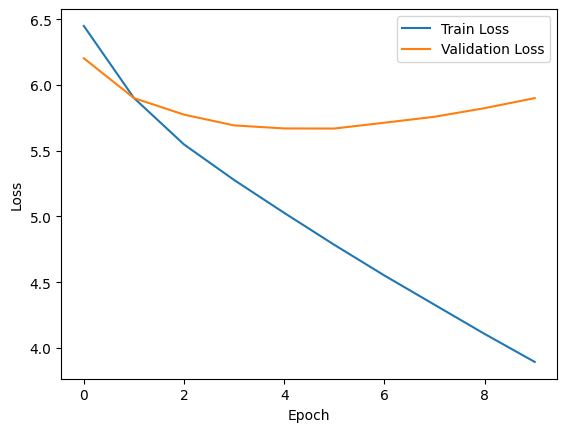

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 128)             │       1,029,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8046)                │       2,067,822 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,475,852 (39.96 MB)

 Trainable params: 3,491,950 (13.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,983,902 (26.64 MB)

In [41]:
def predict_next_words(model, seed_text, word_to_index, index_to_word,
                       sequence_length, top_k=5, temperature=1.0):
    
    words = seed_text.lower().split()
    words = words[-sequence_length:]  # take last X words
    
    encoded = [word_to_index.get(w, 0) for w in words]
    
    # pad if shorter than sequence length
    if len(encoded) < sequence_length:
        encoded = [0] * (sequence_length - len(encoded)) + encoded
    
    encoded = np.array(encoded).reshape(1, -1)
    
    preds = model.predict(encoded, verbose=0)[0]
    
    # temperature scaling
    preds = np.log(preds + 1e-9) / temperature
    preds = np.exp(preds) / np.sum(np.exp(preds))
    
    top_indices = preds.argsort()[-top_k:][::-1]
    
    return [(index_to_word[i], preds[i]) for i in top_indices]


In [50]:
seed ="I will soon make it clear to  "

predict_next_words(
    model,
    seed,
    word_to_index,
    index_to_word,
    SEQUENCE_LENGTH,
    top_k=5,
    temperature=1.3
)


[('you', np.float32(0.10403037)),
 ('the', np.float32(0.052682925)),
 ('my', np.float32(0.036680955)),
 ('that', np.float32(0.036543693)),
 ('me', np.float32(0.031602632))]

In [51]:
seed ="It was clear that "

predict_next_words(
    model,
    seed,
    word_to_index,
    index_to_word,
    SEQUENCE_LENGTH,
    top_k=5,
    temperature=1.3
)

[('i', np.float32(0.073839426)),
 ('you', np.float32(0.061454765)),
 ('he', np.float32(0.06090057)),
 ('the', np.float32(0.060675763)),
 ('she', np.float32(0.04607708))]

In [52]:
good_prompts = [
    "it was clear that",
    "he looked at the",
    "she had never been",
    "i could not help",
    "he was about to"
]

generalization_prompts = [
    "the mystery seemed to",
    "i felt a strange",
    "the room was suddenly",
    "he spoke in a"
]

weird_prompts = [
    "quantum mechanics suggests that",
    "the spaceship landed on",
    "artificial intelligence will",
    "bitcoin price suddenly"
]


In [53]:
def test_prompts(prompts, title):
    print("\n" + "="*50)
    print(title)
    print("="*50)
    
    for p in prompts:
        print(f"\nPrompt: \"{p}\"")
        preds = predict_next_words(
            model,
            p,
            word_to_index,
            index_to_word,
            SEQUENCE_LENGTH,
            top_k=5,
            temperature=1.0
        )
        
        for word, prob in preds:
            print(f"  {word:<10} {prob:.3f}")


In [54]:
test_prompts(good_prompts, "GOOD / COMMON PHRASES")
test_prompts(generalization_prompts, "GENERALIZATION TEST")
test_prompts(weird_prompts, "WEIRD / OUT-OF-DOMAIN TEST")



GOOD / COMMON PHRASES

Prompt: "it was clear that"
  i          0.128
  you        0.101
  he         0.100
  the        0.099
  she        0.069

Prompt: "he looked at the"
  other      0.037
  house      0.023
  door       0.018
  time       0.015
  case       0.015

Prompt: "she had never been"
  to         0.048
  in         0.042
  too        0.030
  able       0.020
  prosecuted 0.019

Prompt: "i could not help"
  me         0.125
  him        0.093
  overhearing 0.054
  suspecting 0.042
  myself     0.026

Prompt: "he was about to"
  the        0.151
  be         0.070
  my         0.029
  her        0.029
  me         0.027

GENERALIZATION TEST

Prompt: "the mystery seemed to"
  be         0.427
  me         0.163
  have       0.024
  you        0.018
  the        0.017

Prompt: "i felt a strange"
  and        0.069
  thing      0.043
  man        0.038
  one        0.026
  little     0.023

Prompt: "the room was suddenly"
  and        0.100
  for        0.059
  as         0.0

In [56]:
model.save("../saved_model/language_model.keras")


In [57]:
import pickle

with open("../saved_model/word_to_index.pkl", "wb") as f:
    pickle.dump(word_to_index, f)

with open("../saved_model/index_to_word.pkl", "wb") as f:
    pickle.dump(index_to_word, f)
